In [39]:
import pandas as pd
from dataprep.eda import create_report
import matplotlib.pyplot as plt
import seaborn as sns

In [40]:
custom_colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f']
plt.rcParams['axes.prop_cycle'] = plt.cycler(color=custom_colors)
plt.rcParams['axes.titlesize'] = 30
plt.rcParams['axes.labelsize'] = 20
plt.rcParams['xtick.labelsize'] = 20
plt.rcParams['ytick.labelsize'] = 20
plt.rcParams['legend.fontsize'] = 15

# Dataset details
The dataset consists of actigraphy data collected from 23 unipolar and bipolar depressed patients (condition group). In addition, the dataset contains actigraphy data from 32 non-depressed contributors (control group), consisting of 23 hospital employees, 5 students and 4 former patients without current psychiatric symptoms.

- number (patient identifier)
- days (number of days of measurements)
- gender (1 or 2 for female or male)
- age (age in age groups)
- afftype (1: bipolar II, 2: unipolar depressive, 3: bipolar I)
- melanch (1: melancholia, 2: no melancholia)
- inpatient (1: inpatient, 2: outpatient), inpatient means hospitalized
- edu (education grouped in years)
- marriage (1: married or cohabiting, 2: single)
- work (1: working or studying, 2: unemployed/sick leave/pension)
- madrs1 (MADRS score when measurement started)
- madrs2 (MADRS when measurement stopped).

In [41]:
df = pd.read_csv('..\data\depresjon\scores.csv')
df

,number,days,gender,age,afftype,melanch,inpatient,edu,marriage,work,madrs1,madrs2
0,condition_1,11,2,35-39,2.0,2.0,2.0,6-10,1.0,2.0,19.0,19.0
1,condition_2,18,2,40-44,1.0,2.0,2.0,6-10,2.0,2.0,24.0,11.0
2,condition_3,13,1,45-49,2.0,2.0,2.0,6-10,2.0,2.0,24.0,25.0
3,condition_4,13,2,25-29,2.0,2.0,2.0,11-15,1.0,1.0,20.0,16.0
4,condition_5,13,2,50-54,2.0,2.0,2.0,11-15,2.0,2.0,26.0,26.0
5,condition_6,7,1,35-39,2.0,2.0,2.0,6-10,1.0,2.0,18.0,15.0
6,condition_7,11,1,20-24,1.0,NaN,2.0,11-15,2.0,1.0,24.0,25.0
7,condition_8,5,2,25-29,2.0,NaN,2.0,11-15,1.0,2.0,20.0,16.0
8,condition_9,13,2,45-49,1.0,NaN,2.0,6-10,1.0,2.0,26.0,26.0
9,condition_10,9,2,45-49,2.0,2.0,2.0,6-10,1.0,2.0,28.0,21.0


In [42]:
#create_report(df).show_browser()

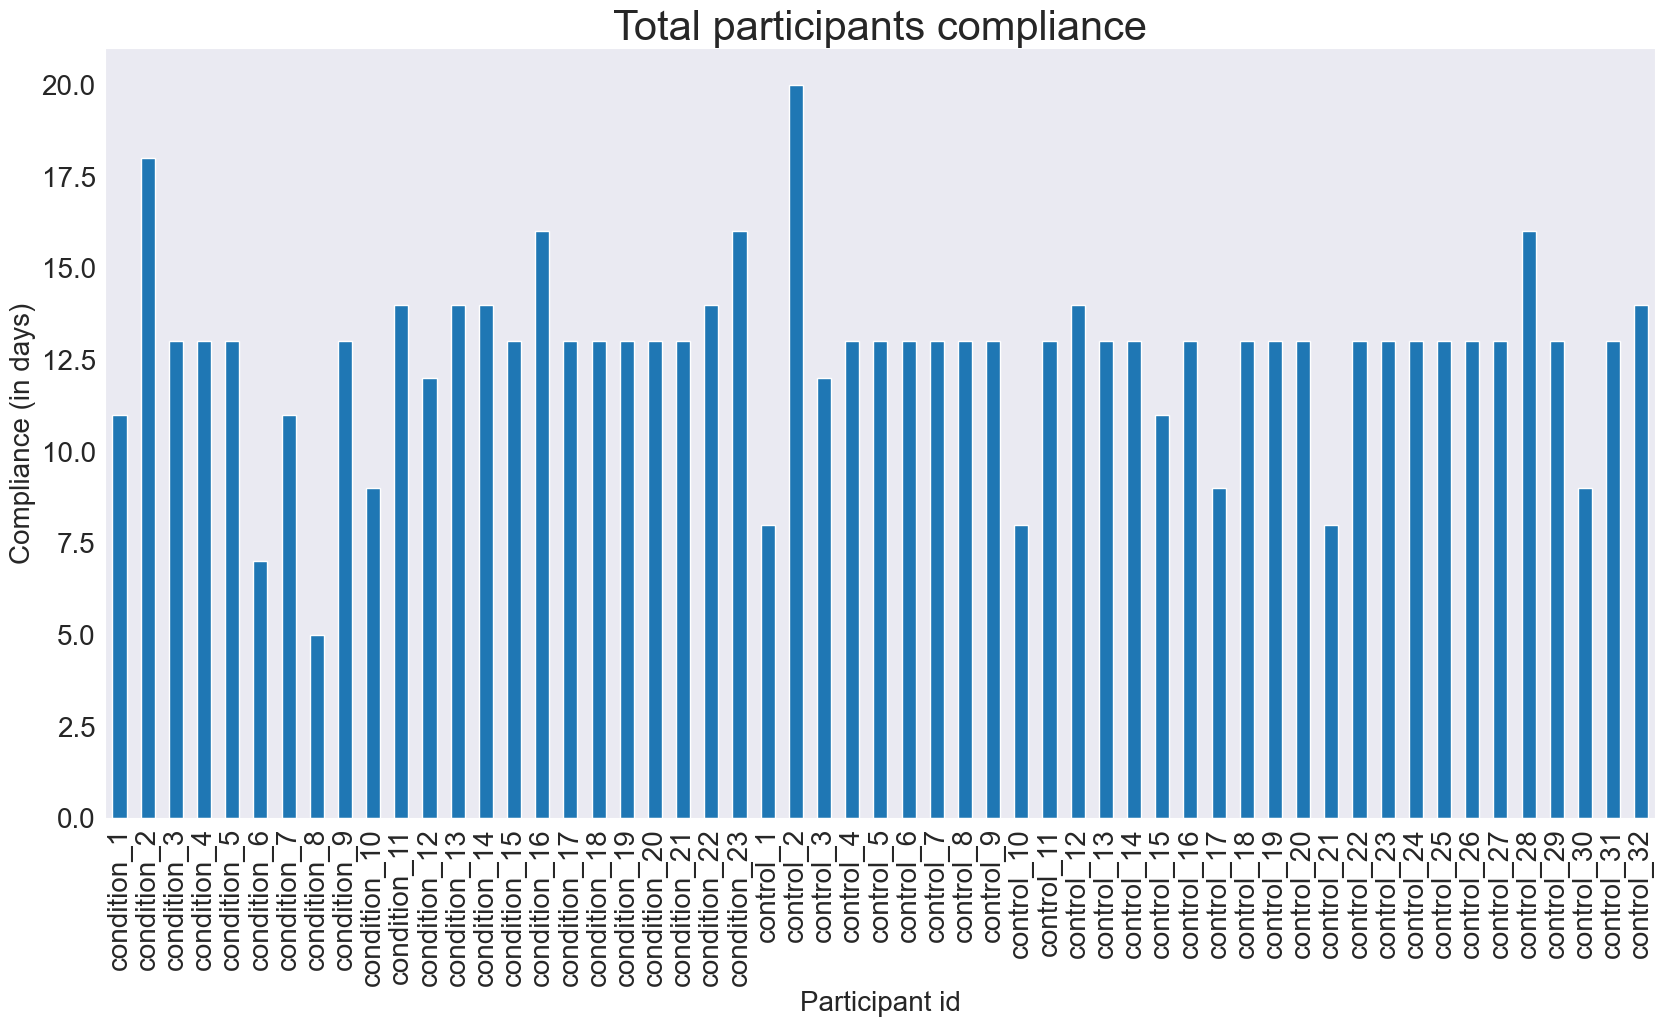

In [43]:
fig, ax = plt.subplots(figsize=(20,10))
df.plot(x="number", y=["days"], kind="bar",ax=ax, color=custom_colors)
plt.xlabel('Participant id')
plt.ylabel('Compliance (in days)')
plt.title('Total participants compliance')
plt.grid()
plt.xticks(rotation=90)
plt.yticks(rotation=0)
ax.legend_.remove()
plt.savefig("../visualizations/compliance_per_participant.png",bbox_inches='tight')
plt.savefig("../visualizations/compliance_per_participant.eps",bbox_inches='tight')
plt.show()

In [44]:
def basic_stats(df, column='days'): # Calculate column's min, max, mean, and median
    min_value = df[column].min()
    max_value = df[column].max()
    mean_value = df[column].mean()
    median_value = df[column].median()

    print("--------------------------------------")
    print(f"Min Compliance: {min_value} days")
    print(f"Max Compliance: {max_value} days")
    print(f"Mean Compliance: {mean_value} days")
    print(f"Median Compliance: {median_value} days")
    print("--------------------------------------")

    return

print("Compliance statistics for all users")
basic_stats(df)

# Separate condition and control groups
condition_df = df[df['number'].str.startswith('condition')]
control_df = df[df['number'].str.startswith('control')]

print("Compliance statistics for condition group")
basic_stats(condition_df)

print("Compliance statistics for control group")
basic_stats(condition_df)

Compliance statistics for all users
--------------------------------------
Min Compliance: 5 days
Max Compliance: 20 days
Mean Compliance: 12.6 days
Median Compliance: 13.0 days
--------------------------------------
Compliance statistics for condition group
--------------------------------------
Min Compliance: 5 days
Max Compliance: 18 days
Mean Compliance: 12.652173913043478 days
Median Compliance: 13.0 days
--------------------------------------
Compliance statistics for control group
--------------------------------------
Min Compliance: 5 days
Max Compliance: 18 days
Mean Compliance: 12.652173913043478 days
Median Compliance: 13.0 days
--------------------------------------


<AxesSubplot: >

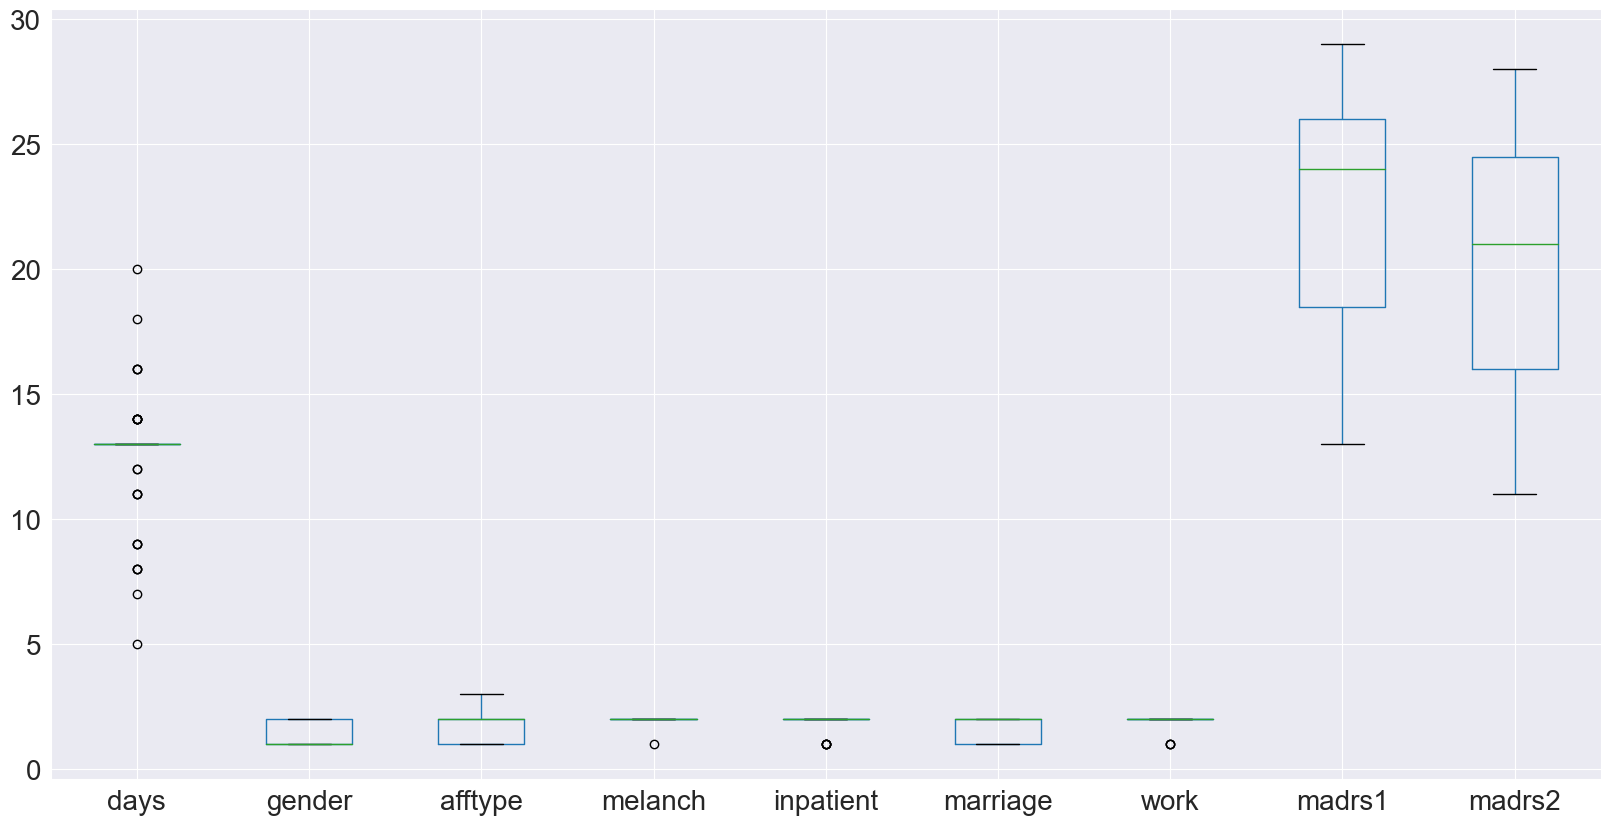

In [45]:
# a box plot for outlier visualization
df.boxplot(figsize=(20,10))

C:\Users\Christina\AppData\Local\Temp\ipykernel_126964\3280773139.py:2: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  df.hist(figsize=(20,10),ax=ax)


array([[<AxesSubplot: title={'center': 'days'}>,
        <AxesSubplot: title={'center': 'gender'}>,
        <AxesSubplot: title={'center': 'afftype'}>],
       [<AxesSubplot: title={'center': 'melanch'}>,
        <AxesSubplot: title={'center': 'inpatient'}>,
        <AxesSubplot: title={'center': 'marriage'}>],
       [<AxesSubplot: title={'center': 'work'}>,
        <AxesSubplot: title={'center': 'madrs1'}>,
        <AxesSubplot: title={'center': 'madrs2'}>]], dtype=object)

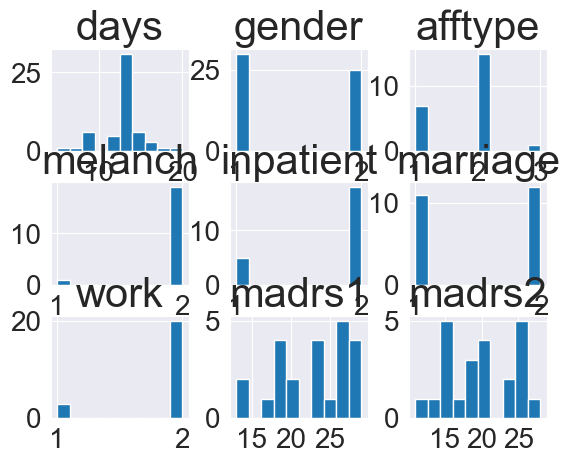

In [46]:
fig, ax = plt.subplots()
df.hist(figsize=(20,10),ax=ax)

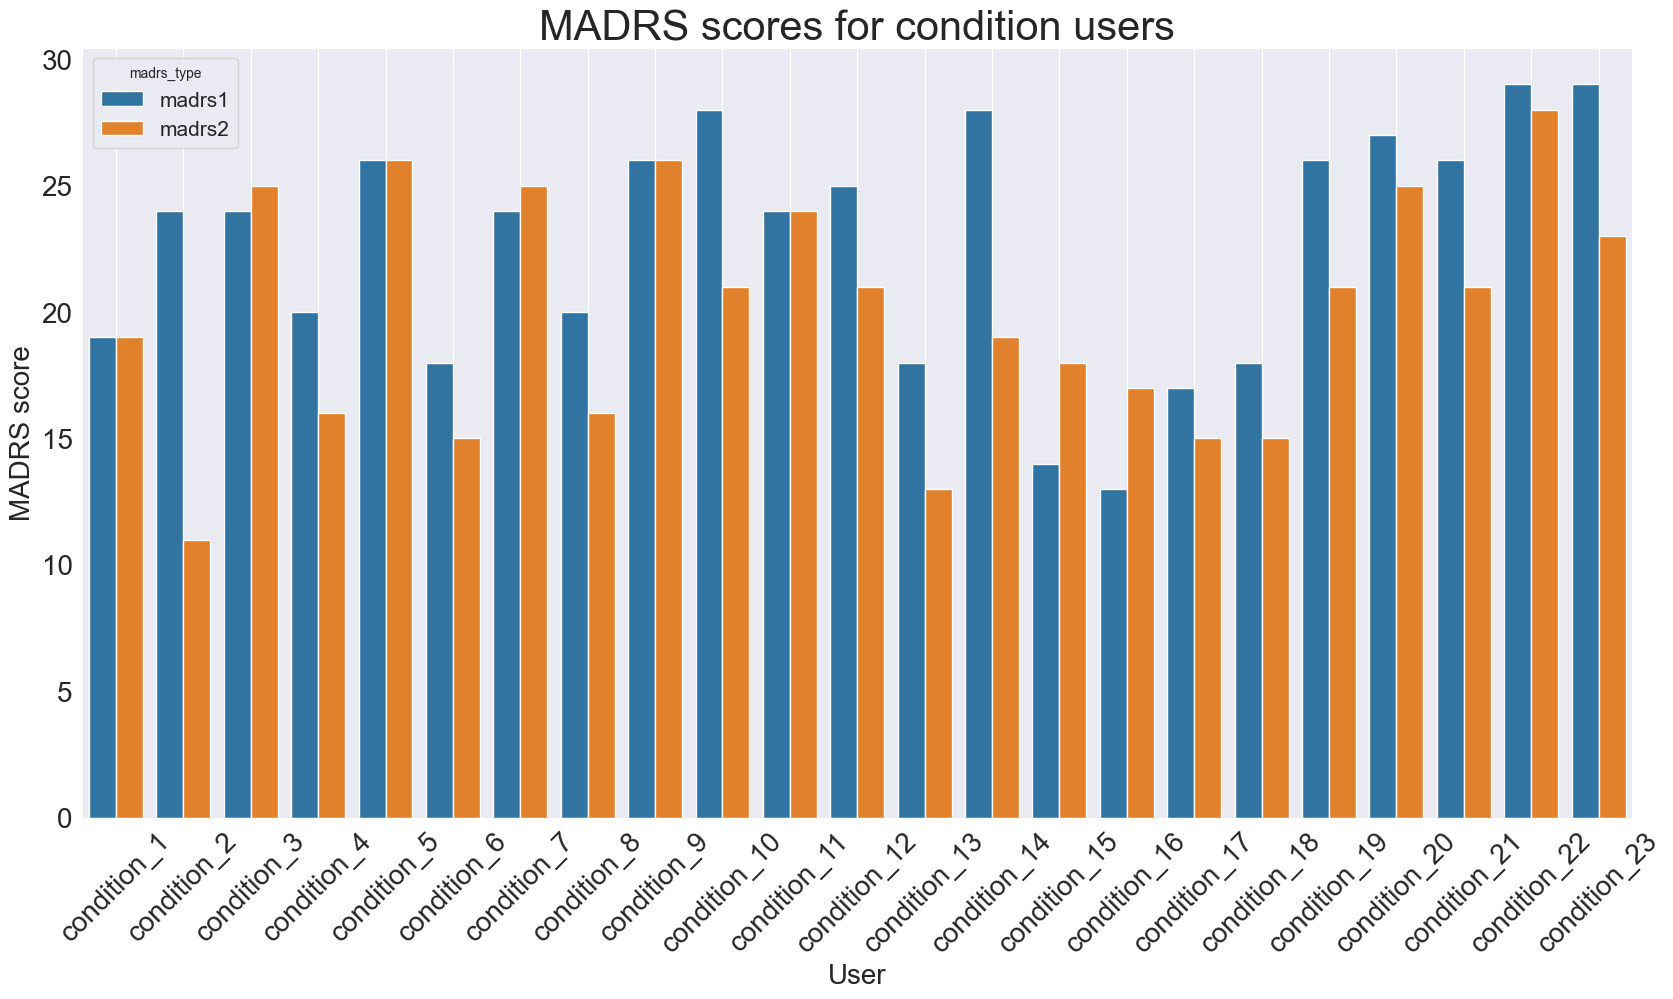

In [50]:
# Melt the DataFrame to 'long' format for seaborn
df_long = pd.melt(condition_df, id_vars=['number'], value_vars=['madrs1', 'madrs2'], var_name='madrs_type',value_name='madrs_value')

# Create a bar plot
plt.figure(figsize=(20, 10))
sns.barplot(x='number', y='madrs_value', hue='madrs_type', data=df_long)
plt.title('MADRS scores for condition users')
plt.xlabel('User')
plt.ylabel('MADRS score')
plt.xticks(rotation=45)
plt.grid()
plt.show()

In [48]:
df['madrs_mean'] = df[['madrs1', 'madrs2']].mean(axis=1)

condition_df['madrs_mean'] = condition_df[['madrs1', 'madrs2']].mean(axis=1)

C:\Users\Christina\AppData\Local\Temp\ipykernel_126964\2612775528.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  condition_df['madrs_mean'] = condition_df[['madrs1', 'madrs2']].mean(axis=1)


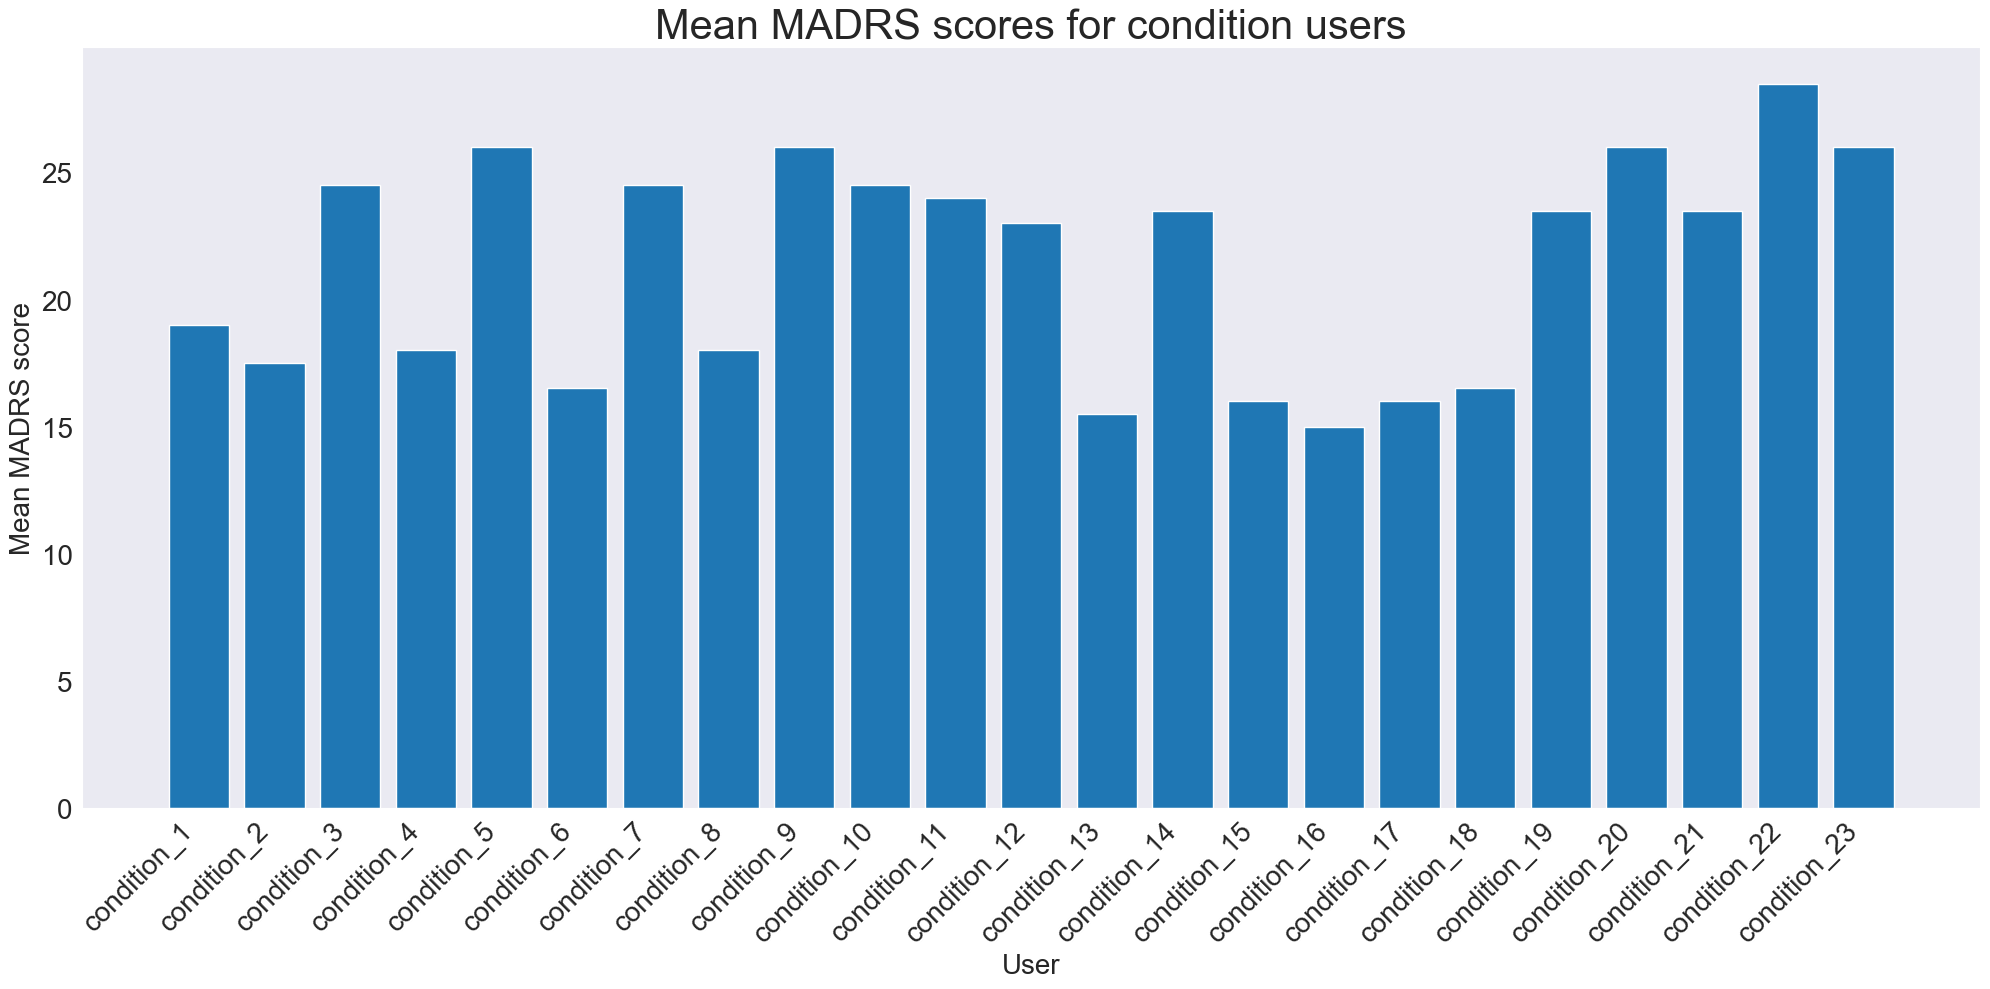

In [53]:
plt.figure(figsize=(20,10))
plt.bar(condition_df['number'], condition_df['madrs_mean'])
plt.xlabel('User')
plt.ylabel('Mean MADRS score')
plt.title('Mean MADRS scores for condition users')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.grid()
plt.show()